In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

from sklearn.model_selection import train_test_split


Iniciamos o pré-processamento dos dados do dataset de classificação, organizando em uma quantidade menor de classes.

> Adicionar aspas



In [ ]:
df_classificacao = pd.read_csv("dataset.csv")

# Dicionário para mapear cada doença ao seu respectivo grupo
grupo_doencas = {
    "Doenças Infecciosas": [
        "Malaria", "Hepatitis A", "Hepatitis B", "Hepatitis C", "Hepatitis D",
        "Hepatitis E", "Tuberculosis", "Typhoid", "Chicken pox", "Dengue", "AIDS",
        "Fungal infection", "Common Cold", "Urinary tract infection", "Gastroenteritis", "Impetigo", "Acne"
    ],
    "Doenças Autoimunes e Alérgicas": [
        "Psoriasis", "Allergy", "Drug Reaction", "Bronchial Asthma", "Chronic cholestasis"
    ],
    "Doenças Metabólicas e Endócrinas": [
        "Diabetes ", "Hypothyroidism", "Hyperthyroidism", "Hypoglycemia"
    ],
    "Doenças Cardiovasculares e Circulatórias": [
        "Hypertension ", "Varicose veins", "Heart attack"
    ],
    "Condições Neurológicas e Musculoesqueléticas": [
        "Osteoarthristis", "Arthritis", "(vertigo) Paroymsal  Positional Vertigo",
        "Cervical spondylosis", "Paralysis (brain hemorrhage)", "Migraine"
    ],
    "Doenças Digestivas e Hepáticas": [
        "GERD", "Peptic ulcer diseae", "Alcoholic hepatitis", "Jaundice",
        "Pneumonia", "Dimorphic hemmorhoids(piles)"
    ]
}

# Função para retornar o grupo da doença
def classificar_doenca(doenca):
    for grupo, doencas in grupo_doencas.items():
        if doenca in doencas:
            return grupo
    return 'Outro'  # Caso a doença não esteja mapeada, retorna 'Outro'

# Aplicar a função ao dataset e criar a nova coluna 'Grupo'
df_classificacao['Grupo'] = df_classificacao['Disease'].apply(classificar_doenca)

df_classificacao = df_classificacao.drop(columns=['Disease'])

# Visualizar as primeiras linhas do dataset atualizado
print(df_classificacao.head())


    Symptom_1              Symptom_2              Symptom_3  \
0     itching              skin_rash   nodal_skin_eruptions   
1   skin_rash   nodal_skin_eruptions    dischromic _patches   
2     itching   nodal_skin_eruptions    dischromic _patches   
3     itching              skin_rash    dischromic _patches   
4     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN    

In [ ]:
df_classificacao.shape

(4920, 18)

In [ ]:
df_classificacao.isna().sum()

,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228
Symptom_10,3408


In [ ]:
# Consolidar todos os sintomas em uma lista única, ignorando os valores nulos
sintomas = pd.melt(df_classificacao.filter(like='Symptom'), value_name='Symptom').dropna()['Symptom'].unique()

# Criar uma lista de DataFrames para armazenar as novas colunas de sintomas
novas_colunas = []

# Criar uma nova coluna para cada sintoma e adicionar à lista
for sintoma in sintomas:
    nova_coluna = df_classificacao.filter(like='Symptom').apply(lambda row: sintoma in row.values, axis=1).astype(int)
    novas_colunas.append(pd.DataFrame({sintoma: nova_coluna}))

# Concatenar todas as novas colunas de uma vez ao DataFrame original
df_classificacao = pd.concat([df_classificacao] + novas_colunas, axis=1)

# Excluir as colunas originais de sintomas
dataset_cleaned = df_classificacao.drop(columns=df_classificacao.filter(like='Symptom').columns)

# Exibir as primeiras linhas do dataset transformado
dataset_cleaned.head()

,Grupo,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,...,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
0,Doenças Infecciosas,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Doenças Infecciosas,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Doenças Infecciosas,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Doenças Infecciosas,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Doenças Infecciosas,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_cleaned.shape

(4920, 132)

In [ ]:
from scipy.stats import spearmanr, chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Supondo que 'Grupo' seja a variável alvo
target = 'Grupo'
correlation_report = {}

for column in dataset_cleaned.columns:
    if column == target:
        continue  # Pular a variável alvo na análise

    if np.issubdtype(dataset_cleaned[column].dtype, np.number):
        # Correlação de Spearman para variáveis numéricas
        corr, _ = spearmanr(dataset_cleaned[column], dataset_cleaned[target])
        correlation_report[column] = abs(corr)  # Usando valor absoluto da correlação
    else:
        # Codificando a variável alvo e a coluna atual para fazer teste de associação para categóricas
        le = LabelEncoder()
        target_encoded = le.fit_transform(dataset_cleaned[target])
        col_encoded = le.fit_transform(dataset_cleaned[column])

        # Tabela de contingência para calcular a associação com Chi-quadrado
        contingency_table = pd.crosstab(col_encoded, target_encoded)
        chi2, _, _, _ = chi2_contingency(contingency_table)

        # Correlação de Cramér
        n = np.sum(contingency_table.values)
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        correlation_report[column] = cramers_v

# Convertendo para DataFrame para visualização
correlation_df = pd.DataFrame.from_dict(correlation_report, orient='index', columns=['Correlation with Grupo'])
correlation_df = correlation_df.sort_values(by='Correlation with Grupo', ascending=False)

# Selecionando as 10 colunas com maior correlação (positiva ou negativa)
top_columns = correlation_df.index[:15].tolist()

# Criando a coluna 'outros' para agrupar as demais variáveis
remaining_columns = [col for col in dataset_cleaned.columns if col not in top_columns and col != target]
dataset_cleaned['outros'] = dataset_cleaned[remaining_columns].apply(lambda row: 1 if row.sum() > 0 else 0, axis=1)

# Criando um novo DataFrame com as colunas selecionadas e a coluna 'outros'
selected_columns = top_columns + ['outros', target]
dataset_reduced = dataset_cleaned[selected_columns]

# Exibindo o DataFrame reduzido
print(dataset_reduced.head())


    fatigue   diarrhoea   lethargy   abnormal_menstruation   loss_of_balance  \
0         0           0          0                       0                 0   
1         0           0          0                       0                 0   
2         0           0          0                       0                 0   
3         0           0          0                       0                 0   
4         0           0          0                       0                 0   

    swelling_joints   mood_swings   painful_walking   restlessness  \
0                 0             0                 0              0   
1                 0             0                 0              0   
2                 0             0                 0              0   
3                 0             0                 0              0   
4                 0             0                 0              0   

    stiff_neck   neck_pain   muscle_pain   mild_fever   loss_of_appetite  \
0            0        

<ipython-input-627-8807e32c79ff>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset_cleaned['outros'] = dataset_cleaned[remaining_columns].apply(lambda row: 1 if row.sum() > 0 else 0, axis=1)


In [ ]:
dataset_reduced.shape

(4920, 17)

In [ ]:
X = dataset_reduced.drop(columns=['Grupo'])
y = dataset_reduced['Grupo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Naive Bayes Classification Report:
                                              precision    recall  f1-score   support

Condições Neurológicas e Musculoesqueléticas       1.00      0.65      0.79       198
              Doenças Autoimunes e Alérgicas       0.20      0.77      0.32       176
    Doenças Cardiovasculares e Circulatórias       0.30      0.62      0.40       104
              Doenças Digestivas e Hepáticas       1.00      0.14      0.25       222
                         Doenças Infecciosas       1.00      0.48      0.65       592
            Doenças Metabólicas e Endócrinas       1.00      0.71      0.83       145
                                       Outro       1.00      1.00      1.00        39

                                    accuracy                           0.53      1476
                                   macro avg       0.79      0.62      0.60      1476
                                weighted avg       0.86      0.53      0.58      1476

K-Nearest Neighb

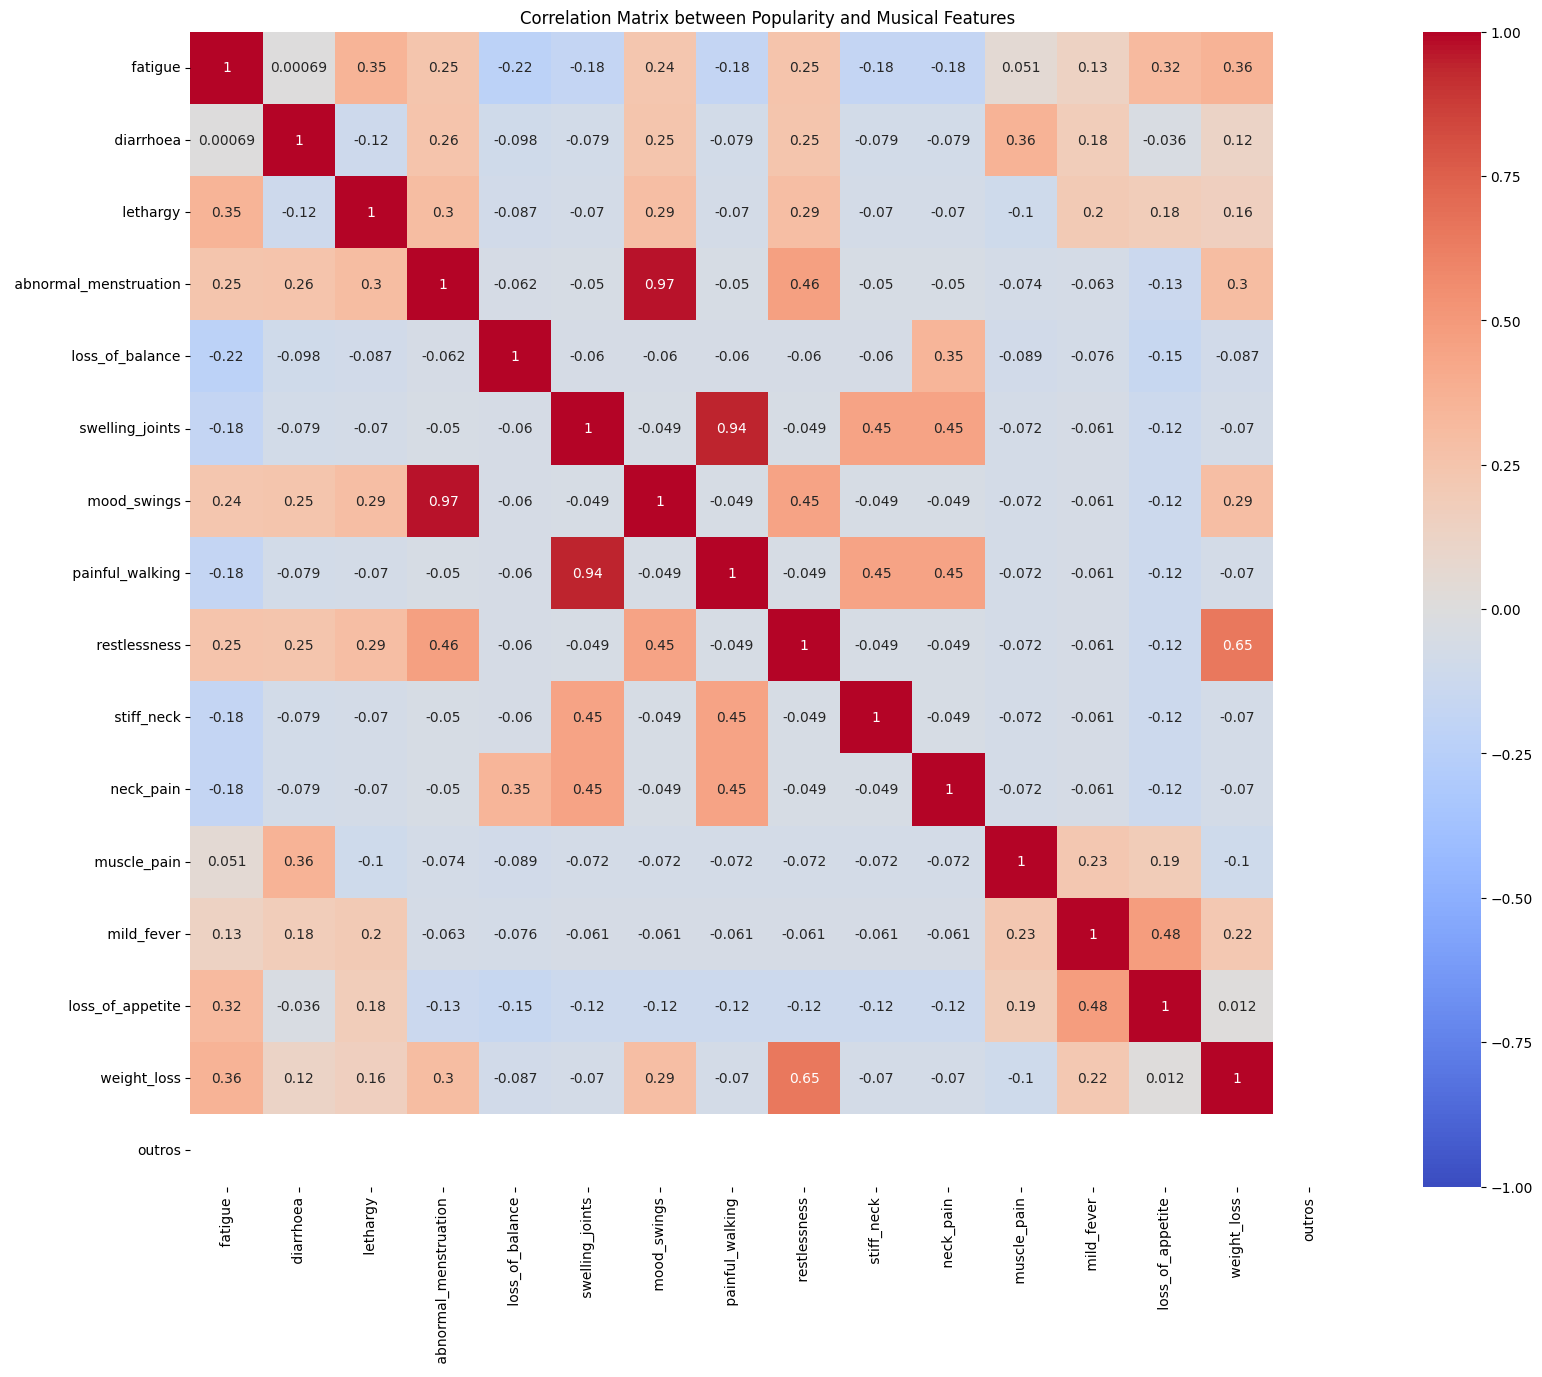

In [ ]:
dataset_reduced_corr = dataset_reduced.drop(columns=['Grupo'])

# Calcular a matriz de correlação
correlation_matrix = dataset_reduced_corr.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matriz de Correlação entre sintomas")
plt.show()


In [ ]:
print(dataset_reduced.columns)


Index([' fatigue', ' diarrhoea', ' lethargy', ' abnormal_menstruation',
       ' loss_of_balance', ' swelling_joints', ' mood_swings',
       ' painful_walking', ' restlessness', ' stiff_neck', ' neck_pain',
       ' muscle_pain', ' mild_fever', ' loss_of_appetite', ' weight_loss',
       'outros', 'Grupo'],
      dtype='object')


In [ ]:
df_reduced = dataset_reduced.drop(columns=[' abnormal_menstruation', ' swelling_joints'])

X = df_reduced.drop(columns=['Grupo'])
y = df_reduced['Grupo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))



Naive Bayes Classification Report:
                                              precision    recall  f1-score   support

Condições Neurológicas e Musculoesqueléticas       1.00      0.65      0.79       198
              Doenças Autoimunes e Alérgicas       0.20      0.77      0.32       176
    Doenças Cardiovasculares e Circulatórias       0.30      0.62      0.40       104
              Doenças Digestivas e Hepáticas       1.00      0.14      0.25       222
                         Doenças Infecciosas       1.00      0.36      0.53       592
            Doenças Metabólicas e Endócrinas       0.59      0.71      0.64       145
                                       Outro       1.00      1.00      1.00        39

                                    accuracy                           0.48      1476
                                   macro avg       0.73      0.61      0.56      1476
                                weighted avg       0.81      0.48      0.51      1476

K-Nearest Neighb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Após notar quais colunas deveriam ser retiradas, voltamos para pegar as proximas 2 colunas relevantes para manter 15 colunas no dataset


In [ ]:
# Remover as 2 colunas com alta correlação
colunas_removidas = [' abnormal_menstruation', ' swelling_joints']
top_columns = [col for col in top_columns if col not in colunas_removidas]

# Adicionar os próximos 2 sintomas na lista original para substituir os removidos
prox_sintomas = correlation_df.index[15:17].tolist()
top_columns += prox_sintomas

# Criando a coluna 'outros' para agrupar as demais variáveis
remaining_columns = [col for col in dataset_cleaned.columns if col not in top_columns and col != target]
dataset_cleaned['outros'] = dataset_cleaned[remaining_columns].apply(lambda row: 1 if row.sum() > 0 else 0, axis=1)

# Criando um novo DataFrame com as colunas selecionadas e a coluna 'outros'
selected_columns = top_columns + ['outros', target]
dataset_reduced = dataset_cleaned[selected_columns]

# Exibindo o DataFrame reduzido
print(dataset_reduced.head())

    fatigue   diarrhoea   lethargy   loss_of_balance   mood_swings  \
0         0           0          0                 0             0   
1         0           0          0                 0             0   
2         0           0          0                 0             0   
3         0           0          0                 0             0   
4         0           0          0                 0             0   

    painful_walking   restlessness   stiff_neck   neck_pain   muscle_pain  \
0                 0              0            0           0             0   
1                 0              0            0           0             0   
2                 0              0            0           0             0   
3                 0              0            0           0             0   
4                 0              0            0           0             0   

    mild_fever   loss_of_appetite   weight_loss   irritability  \
0            0                  0             0   

In [ ]:
X = dataset_reduced.drop(columns=['Grupo'])
y = dataset_reduced['Grupo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

Naive Bayes Classification Report:
                                              precision    recall  f1-score   support

Condições Neurológicas e Musculoesqueléticas       0.98      0.65      0.78       198
              Doenças Autoimunes e Alérgicas       0.18      0.17      0.17       176
    Doenças Cardiovasculares e Circulatórias       0.15      1.00      0.27       104
              Doenças Digestivas e Hepáticas       0.84      0.14      0.24       222
                         Doenças Infecciosas       1.00      0.36      0.53       592
            Doenças Metabólicas e Endócrinas       0.67      0.98      0.80       145
                                       Outro       1.00      1.00      1.00        39

                                    accuracy                           0.47      1476
                                   macro avg       0.69      0.61      0.54      1476
                                weighted avg       0.78      0.47      0.50      1476

K-Nearest Neighb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Foi notado que ao se alterar o test_size de 0.3 para 0.2 o valor de acuracia dos modelos knn e rede neurais cairam um pouco, enquanto naive bayes teve um leve aumento, porém é perceptivel que apesar da maior acuracia ser do algoritmo de redes neurais, ele esta ignorando a classe "Doenças Cardiovasculares e Circulatórias".

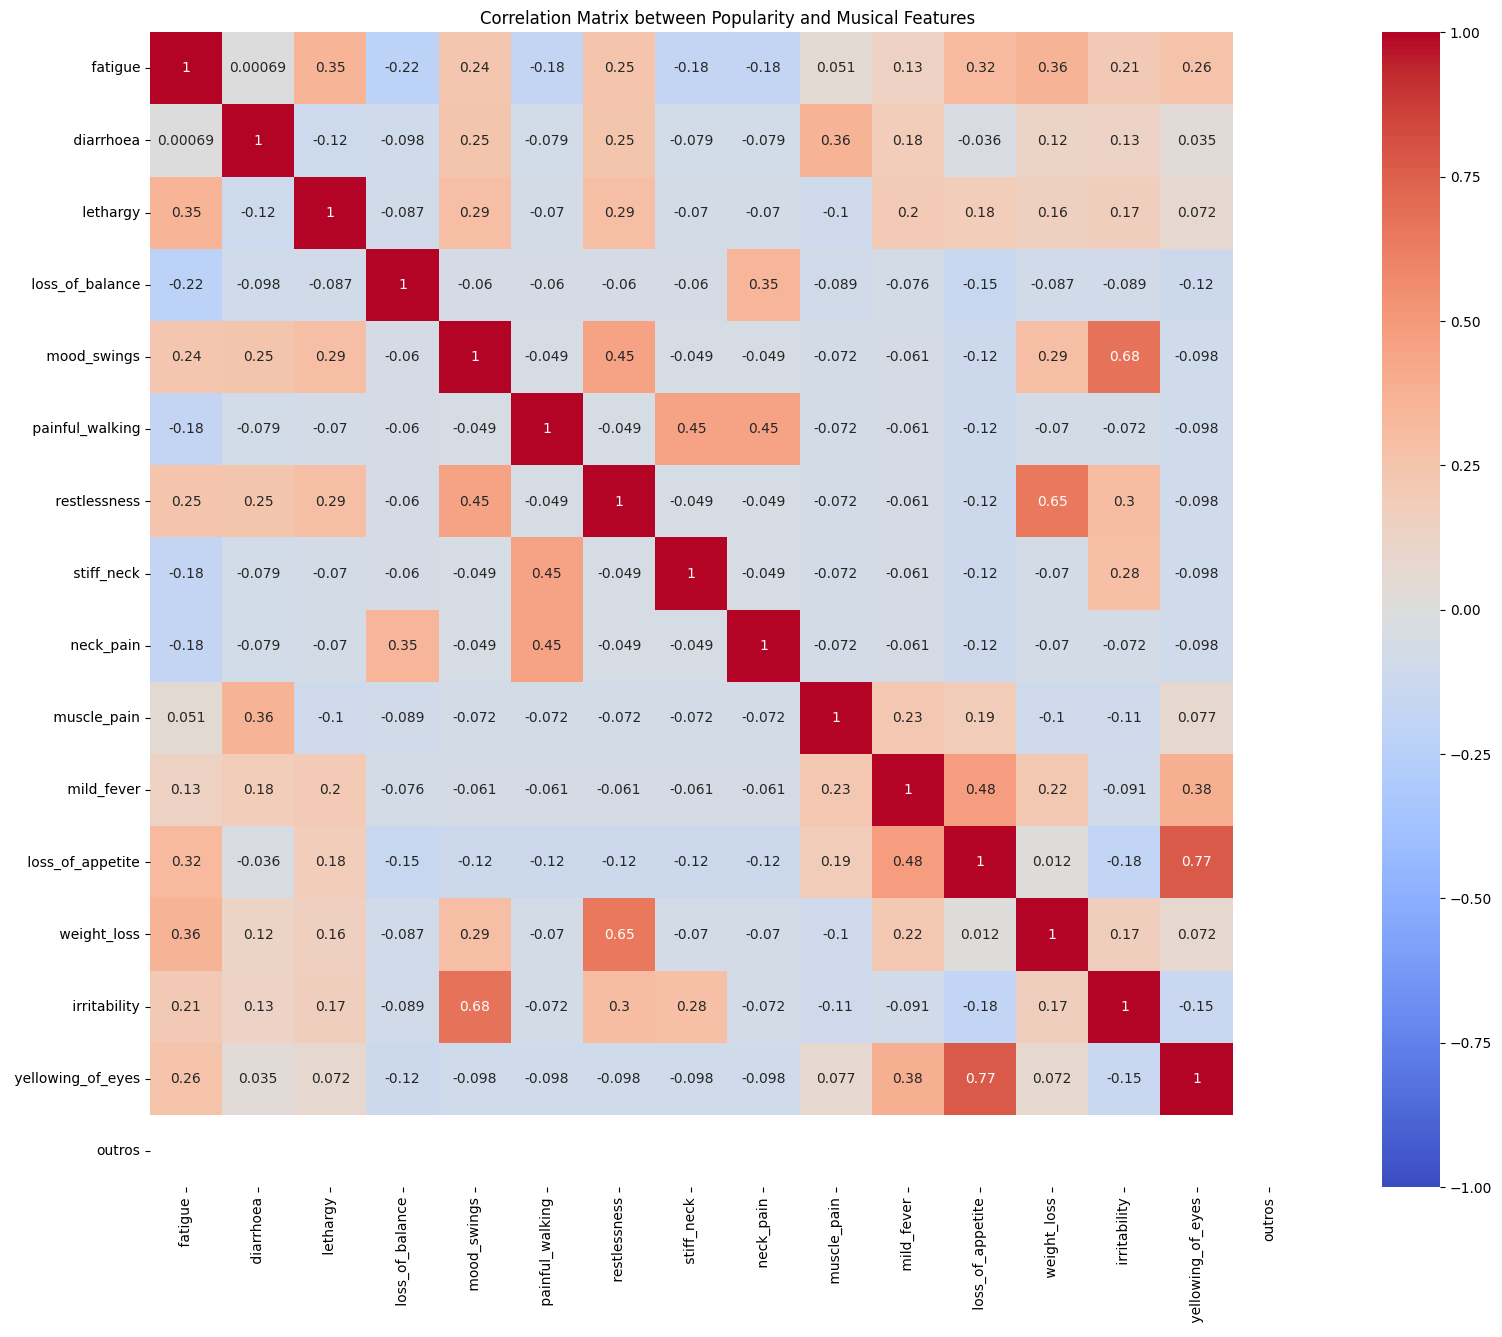

In [ ]:
dataset_reduced_corr = dataset_reduced.drop(columns=['Grupo'])

# Calcular a matriz de correlação
correlation_matrix = dataset_reduced_corr.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matriz de Correlação entre sintomas")
plt.show()

Após retirar algumas colunas com uma correlação muito alta entre atributos, conseguimos encontrar as 15 colunas com maior correlação com a classe alvo, sem ter tanta relação entre si.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Classification Report:
                                              precision    recall  f1-score   support

Condições Neurológicas e Musculoesqueléticas       1.00      0.65      0.79       198
              Doenças Autoimunes e Alérgicas       0.00      0.00      0.00       176
    Doenças Cardiovasculares e Circulatórias       0.49      0.29      0.36       104
              Doenças Digestivas e Hepáticas       0.37      0.41      0.39       222
                         Doenças Infecciosas       0.64      0.98      0.78       592
            Doenças Metabólicas e Endócrinas       0.98      0.71      0.82       145
                                       Outro       1.00      1.00      1.00        39

                                    accuracy                           0.66      1476
                                   macro avg       0.64      0.58      0.59      1476
                                weighted avg       0.61      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


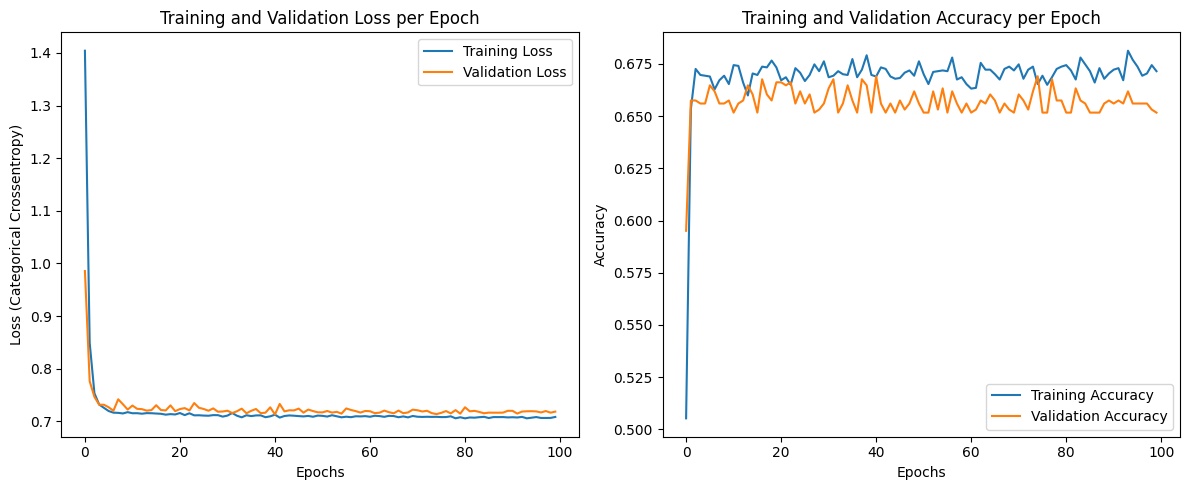

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separação entre variáveis independentes e dependentes
X = df_reduced.drop(columns=['Grupo'])
y = df_reduced['Grupo']

# Convertendo y para formato categórico
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Construindo o modelo de rede neural usando Keras
model_nn = Sequential()
model_nn.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(Dense(50, activation='relu'))
model_nn.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compilando o modelo com entropia cruzada categórica como função de perda
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo e salvando o histórico
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Avaliando o modelo de rede neural
y_pred_nn_prob = model_nn.predict(X_test)
y_pred_nn = y_pred_nn_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Relatório de classificação
print("Neural Network Classification Report:")
print(classification_report(y_test_labels, y_pred_nn, target_names=label_encoder.classes_))

# Plotando o gráfico de perda e acurácia ao longo das épocas
plt.figure(figsize=(12, 5))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.title('Training and Validation Loss per Epoch')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()


De acordo com o grafico de perda, ele se estabiliza após cerca de 10 a 15 épocas. Quanto a acuracia estabiliza aproximadamente após 10 épocas.

In [ ]:
# Construindo o modelo de rede neural usando Keras
model_nn = Sequential()
model_nn.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(Dense(50, activation='relu'))
model_nn.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compilando o modelo com entropia cruzada categórica como função de perda
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo e salvando o histórico
history = model_nn.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=0)

# Avaliando o modelo de rede neural
y_pred_nn_prob = model_nn.predict(X_test)
y_pred_nn = y_pred_nn_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Relatório de classificação
print("Neural Network Classification Report:")
print(classification_report(y_test_labels, y_pred_nn, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Classification Report:
                                              precision    recall  f1-score   support

Condições Neurológicas e Musculoesqueléticas       1.00      0.65      0.79       198
              Doenças Autoimunes e Alérgicas       0.25      0.77      0.37       176
    Doenças Cardiovasculares e Circulatórias       0.49      0.29      0.36       104
              Doenças Digestivas e Hepáticas       0.37      0.32      0.34       222
                         Doenças Infecciosas       1.00      0.67      0.81       592
            Doenças Metabólicas e Endócrinas       0.98      0.71      0.82       145
                                       Outro       1.00      1.00      1.00        39

                                    accuracy                           0.61      1476
                                   macro avg       0.73      0.63      0.64      1476
                                weighted avg       0.78      

#Desenvolvimento do dataset de regressão


In [ ]:
df_regressao = pd.read_csv("data_by_genres.csv")
df_regressao.head()


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [ ]:
df_regressao.shape

(2664, 14)

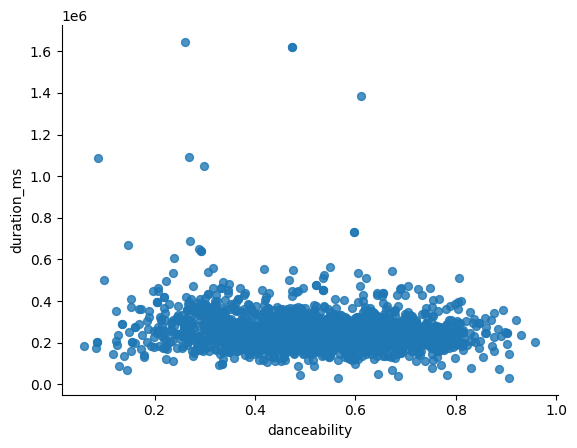

In [ ]:
from matplotlib import pyplot as plt
df_regressao.plot(kind='scatter', x='danceability', y='duration_ms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

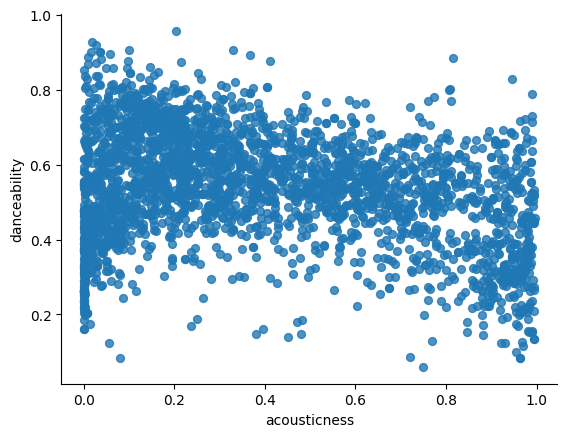

In [ ]:

from matplotlib import pyplot as plt
df_regressao.plot(kind='scatter', x='acousticness', y='danceability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

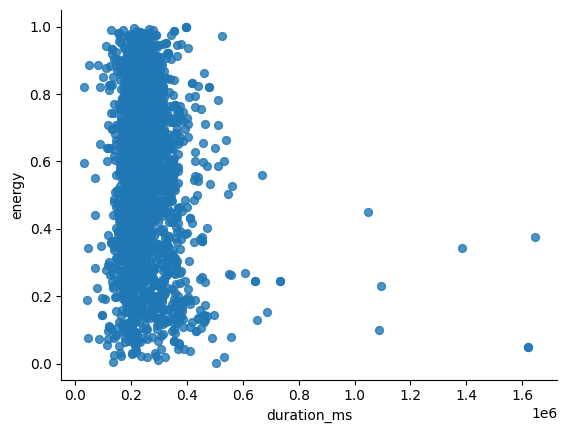

In [ ]:

from matplotlib import pyplot as plt
df_regressao.plot(kind='scatter', x='duration_ms', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

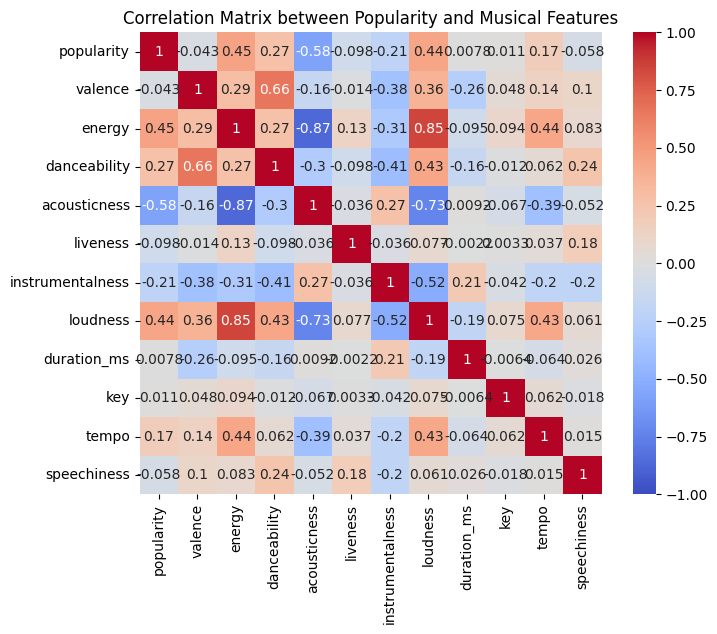

In [ ]:
df_regr = df_regressao.drop(columns=['genres'])

# Selecionar apenas as colunas relevantes para a análise de correlação
corr_columns = ['popularity', 'valence', 'energy', 'danceability', 'acousticness', 'liveness', 'instrumentalness', 'loudness', 'duration_ms', 'key', 'tempo', 'speechiness']
subset_data = df_regr[corr_columns]

# Calcular a matriz de correlação
correlation_matrix = subset_data.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix between Popularity and Musical Features")
plt.show()


In [ ]:
df_regr_simp = df_regr.drop(columns=['liveness', 'valence', 'duration_ms', 'key', 'energy', 'instrumentalness'])
df_regr_simp.head()


,acousticness,danceability,loudness,speechiness,tempo,popularity,mode
0,0.494780,0.299333,-16.854000,0.076817,120.285667,52.166667,1
1,0.679245,0.521473,-12.679076,0.112267,112.025168,21.682005,1
2,0.621532,0.577017,-12.770211,0.095324,111.813230,43.351819,1
3,0.359395,0.459500,-14.092000,0.043420,124.743200,41.500000,1
4,0.353347,0.694400,-6.699800,0.143453,119.398400,58.600000,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajusta e transforma as colunas necessárias
df_regr_simp[['acousticness', 'danceability', 'tempo', 'loudness', 'speechiness']] = scaler.fit_transform(
    df_regr_simp[['acousticness', 'danceability', 'tempo', 'loudness', 'speechiness']]
)

df_regr_simp.head()


,acousticness,danceability,loudness,speechiness,tempo,popularity,mode
0,0.304949,-1.597132,-1.297072,-0.086454,0.082030,52.166667,1
1,0.892625,-0.101537,-0.461056,0.355823,-0.389399,21.682005,1
2,0.708760,0.272420,-0.479306,0.144446,-0.401494,43.351819,1
3,-0.126366,-0.518783,-0.743990,-0.503109,0.336422,41.500000,1
4,-0.145635,1.062722,0.736275,0.744901,0.031393,58.600000,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separar as variáveis preditoras (X) e o alvo (y)
X = df_regr_simp.drop(columns=['popularity'])
y = df_regr_simp['popularity']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar o modelo de Regressão Linear
linear_model = LinearRegression()

# Treinar o modelo
linear_model.fit(X_train, y_train)

# Fazer previsões
y_pred_linear = linear_model.predict(X_test)

# Avaliar o desempenho
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Regressão Linear - MSE:", mse_linear, "R2:", r2_linear)


Regressão Linear - MSE: 164.61500891369292 R2: 0.38899922102868145


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar o modelo da Árvore de Decisão
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Treinar o modelo
tree_model.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_model.predict(X_test)

# Avaliar o desempenho
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Árvore de Decisão - MSE:", mse_tree, "R2:", r2_tree)


Árvore de Decisão - MSE: 132.8225746353478 R2: 0.5070030545651962



Usando função de ativação: relu


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Rede Neural (relu) - MSE: 118.61543844645293 R2: 0.5597356172619403

Usando função de ativação: tanh


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Rede Neural (tanh) - MSE: 126.15845084675813 R2: 0.5317382524846302

Usando função de ativação: sigmoid


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Rede Neural (sigmoid) - MSE: 140.89726651218476 R2: 0.47703225749597244

Usando função de ativação: elu


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Rede Neural (elu) - MSE: 117.67842457882331 R2: 0.5632135273675054


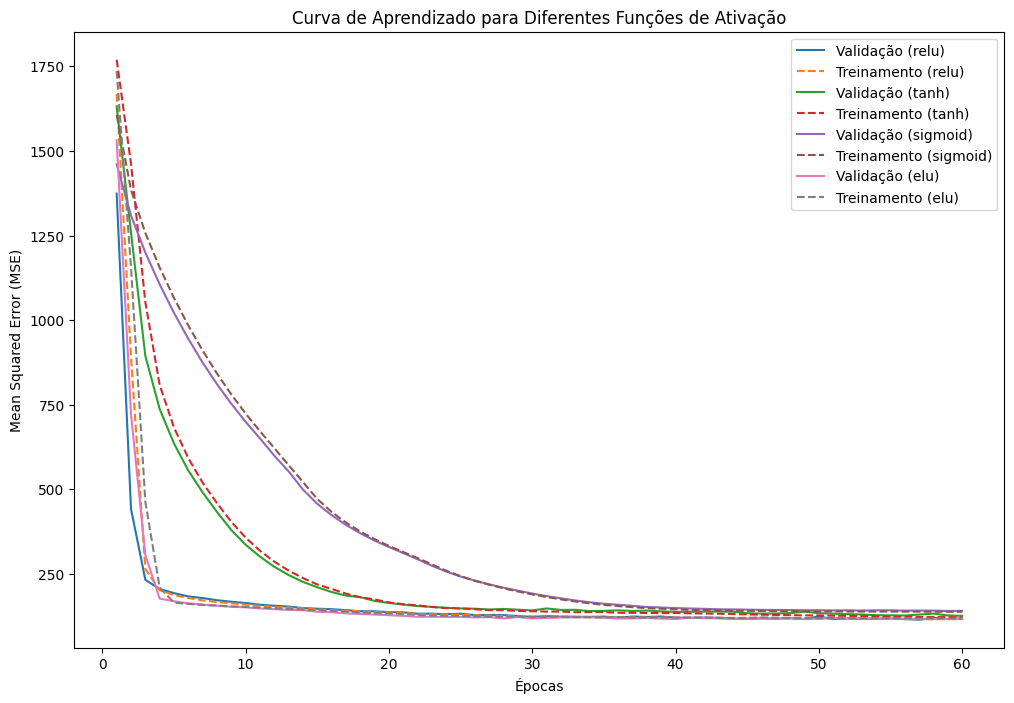

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Função para criar e compilar o modelo de rede neural no Keras com diferentes ativações
def create_neural_model(activation_fn):
    model = Sequential([
        Dense(64, activation=activation_fn, input_shape=(X_train.shape[1],)),  # Primeira camada oculta
        Dense(32, activation=activation_fn),  # Segunda camada oculta
        Dense(1)  # Camada de saída sem ativação para regressão
    ])
    # Compilar o modelo
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Armazenar o histórico de treinamento de cada função de ativação
histories = {}
epochs = 60

# Treinamento e Avaliação com diferentes funções de ativação
for activation in ['relu', 'tanh', 'sigmoid', 'elu']:
    print(f"\nUsando função de ativação: {activation}")
    neural_model = create_neural_model(activation)

    # Treinamento com histórico
    history = neural_model.fit(X_train_scaled, y_train,
                               validation_data=(X_test_scaled, y_test),
                               epochs=epochs,
                               batch_size=32,
                               verbose=0)

    # Armazenar o histórico
    histories[activation] = history.history

    # Fazer previsões
    y_pred_neural = neural_model.predict(X_test_scaled).flatten()

    # Avaliar o desempenho
    mse_neural = mean_squared_error(y_test, y_pred_neural)
    r2_neural = r2_score(y_test, y_pred_neural)
    print(f"Rede Neural ({activation}) - MSE:", mse_neural, "R2:", r2_neural)

# Plotar as curvas de aprendizado para cada função de ativação
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(range(1, epochs + 1), history['val_loss'], label=f'Validação ({activation})')
    plt.plot(range(1, epochs + 1), history['loss'], linestyle='--', label=f'Treinamento ({activation})')

plt.xlabel('Épocas')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Curva de Aprendizado para Diferentes Funções de Ativação')
plt.legend()
plt.show()


Nota-se que a função relu teve um melhor desempenho sendo assim, aplicando a regra do cotovelo podemos deduzir q um bom valor para as epocas esteja entre 10 e 20.

In [ ]:

# Função para criar e compilar o modelo de rede neural no Keras com 'relu' como função de ativação
def create_neural_model_relu():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Primeira camada oculta
        Dense(32, activation='relu'),  # Segunda camada oculta
        Dense(1)  # Camada de saída sem ativação para regressão
    ])

    # Compilar o modelo
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Inicializar o modelo
neural_model = create_neural_model_relu()

# Treinamento por 20 épocas
history = neural_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Fazer previsões
y_pred_neural = neural_model.predict(X_test).flatten()

# Avaliar o desempenho
mse_neural = mean_squared_error(y_test, y_pred_neural)
r2_neural = r2_score(y_test, y_pred_neural)

# Exibir os resultados
print("Desempenho com função de ativação 'relu' e 20 épocas:")
print("Rede Neural (relu) - MSE:", mse_neural, "R2:", r2_neural)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1818.9213 - mse: 1818.9213 - val_loss: 1397.9574 - val_mse: 1397.9574
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1151.5009 - mse: 1151.5009 - val_loss: 321.1898 - val_mse: 321.1898
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 232.3797 - mse: 232.3797 - val_loss: 214.6037 - val_mse: 214.6037
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.5734 - mse: 193.5734 - val_loss: 196.5693 - val_mse: 196.5693
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.8101 - mse: 194.8101 - val_loss: 186.6854 - val_mse: 186.6854
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183.8499 - mse: 183.8499 - val_loss: 179.7805 - val_mse: 179.7805
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174.5096 - mse: 174.5096 - val_loss: 173.2899 - val_mse: 173.2899
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174.5339 - mse: 174.5339 - val_loss: 165.7416 - val_mse: 165.7416
Epoch 9/20
67

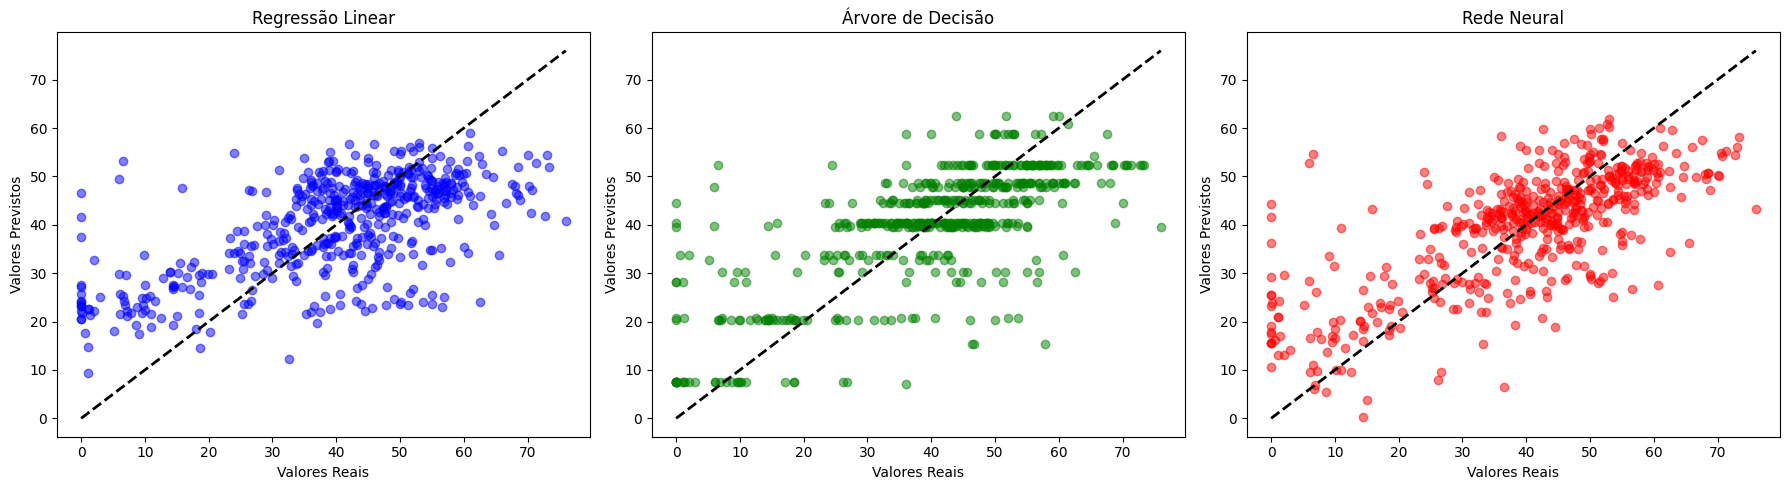

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho da figura
plt.figure(figsize=(18, 5))

# Regressão Linear
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão Linear")

# Árvore de Decisão
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Árvore de Decisão")

# Rede Neural
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_neural, alpha=0.5, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Rede Neural")

plt.tight_layout()
plt.show()


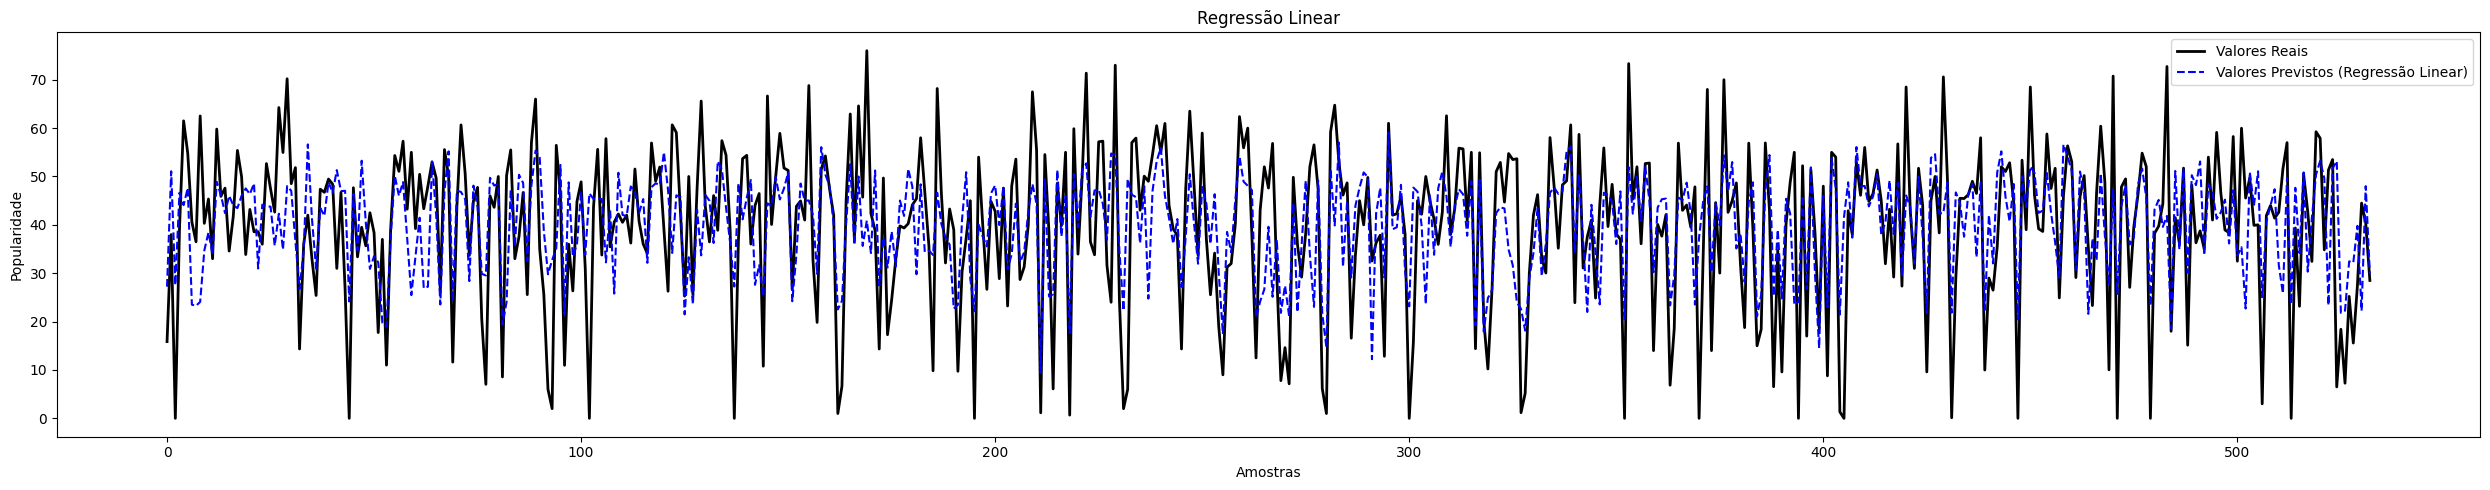

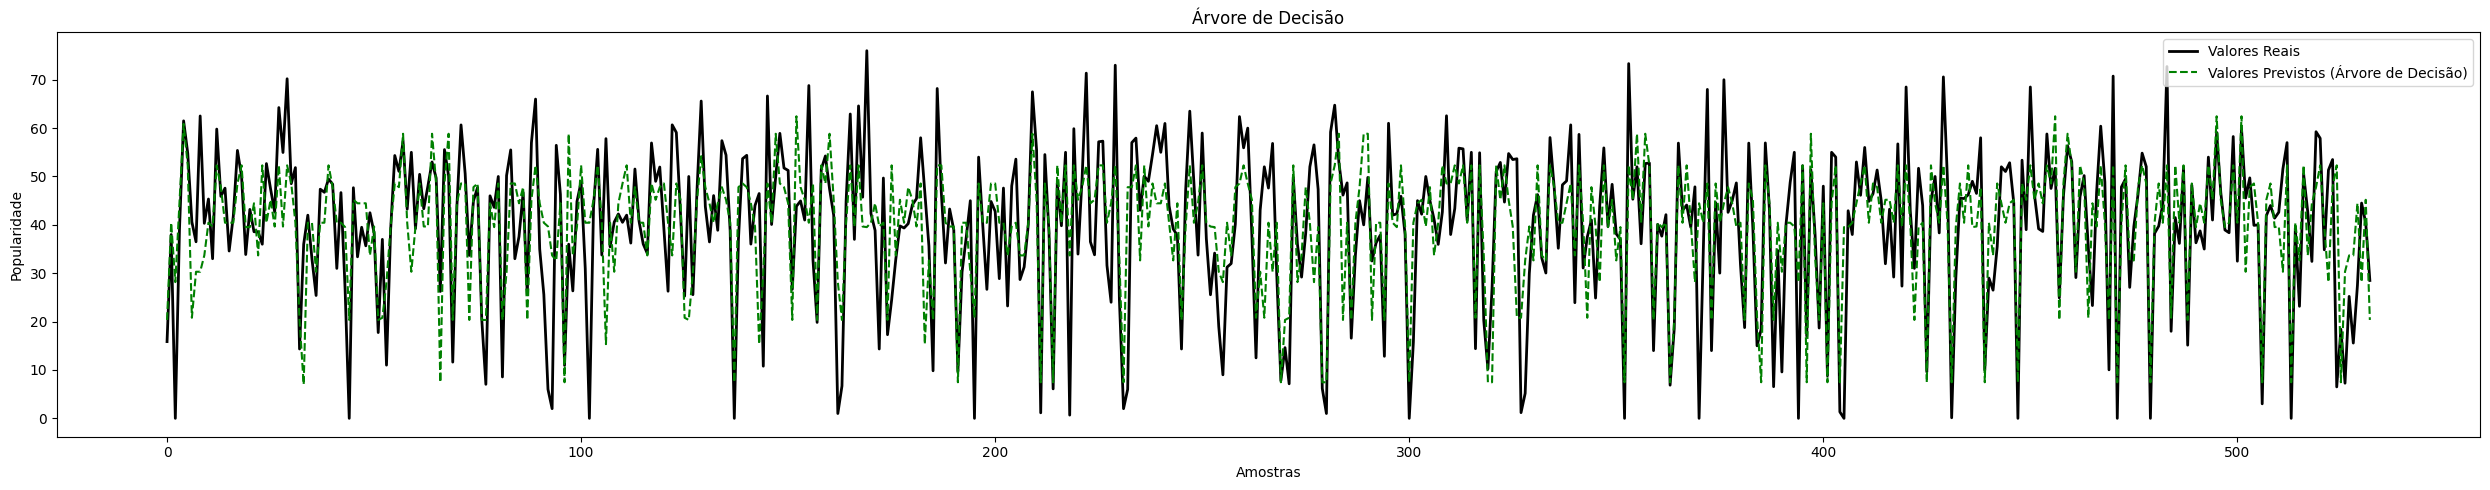

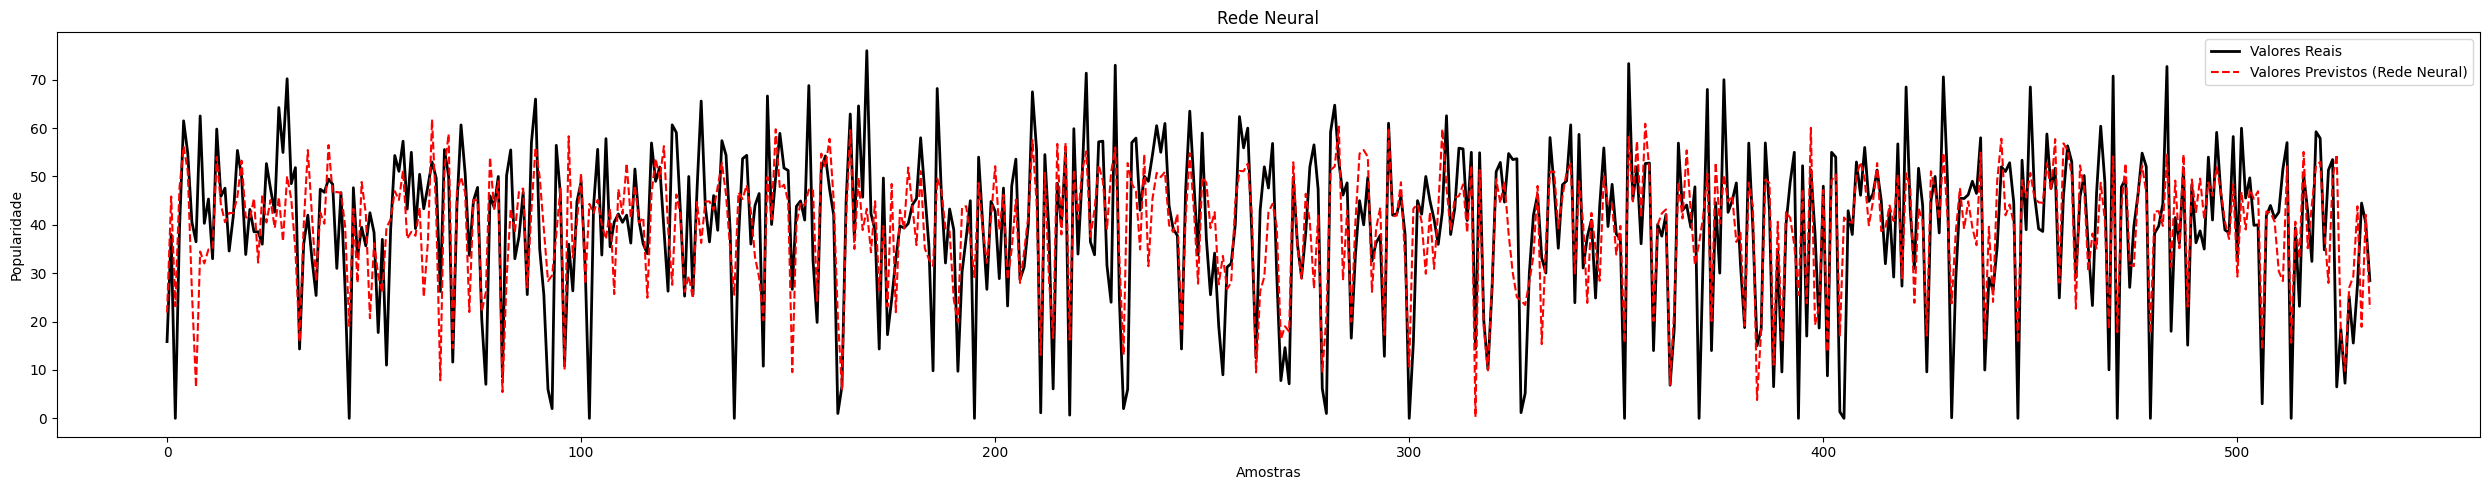

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supõe-se que y_test, y_pred_linear, y_pred_tree, y_pred_neural estejam definidos

# Plotando para Regressão Linear
plt.figure(figsize=(25, 5))
plt.plot(y_test.values, label="Valores Reais", color="black", linewidth=2)
plt.plot(y_pred_linear, label="Valores Previstos (Regressão Linear)", color="blue", linestyle='--')
plt.xlabel("Amostras")
plt.ylabel("Popularidade")
plt.title("Regressão Linear")
plt.legend()
plt.tight_layout()
plt.show()

# Plotando para Árvore de Decisão
plt.figure(figsize=(25, 5))
plt.plot(y_test.values, label="Valores Reais", color="black", linewidth=2)
plt.plot(y_pred_tree, label="Valores Previstos (Árvore de Decisão)", color="green", linestyle='--')
plt.xlabel("Amostras")
plt.ylabel("Popularidade")
plt.title("Árvore de Decisão")
plt.legend()
plt.tight_layout()
plt.show()

# Plotando para Rede Neural
plt.figure(figsize=(25, 5))
plt.plot(y_test.values, label="Valores Reais", color="black", linewidth=2)
plt.plot(y_pred_neural, label="Valores Previstos (Rede Neural)", color="red", linestyle='--')
plt.xlabel("Amostras")
plt.ylabel("Popularidade")
plt.title("Rede Neural")
plt.legend()
plt.tight_layout()
plt.show()
